<a href="https://colab.research.google.com/github/Pratik325/CNN-MADE-EASY/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING REQUIRED LIBRARIES**

In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
if not os.path.isdir('models'):
    os.mkdir('models')
print('Tensorflow version:', tf.__version__)
print('is using GPU?', tf.test.is_gpu_available())


Tensorflow version: 2.2.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
is using GPU? True


**PREPROCESSING THE DATA**
**For simplicity using only 3 classes from cifar-10 dataset **

In [0]:

def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)
    
    indices = np.concatenate([indices_0, indices_1, indices_2], axis = 0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    
    indices = np.random.choice(range(count), count, replace = False)
    
    x = x[indices]
    y = y[indices]
    
    
    #CONVERTING TO ONE HOT ENCODE
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

Getting the data

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

170500096/170498071 [==============================] - 6s 0us/step


**PRINTING THE SHAPE**

In [4]:
print(x_train.shape)
print(x_test.shape)

(15000, 32, 32, 3)
(3000, 32, 32, 3)


**VISUALISE EXAMPLES**

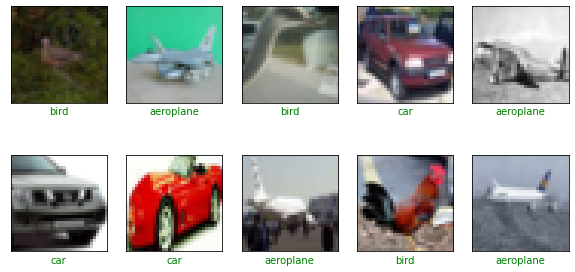

In [15]:
class_names = ['aeroplane', 'car', 'bird']


def show_random_examples(x, y, p):

  indices = np.random.choice( range(x.shape[0]), 10, replace = False)

  x = x[indices]
  y = y[indices]
  p = p[indices]

  plt.figure(figsize=(10, 5))
  for i in range(10):
    plt.subplot(2, 5, 1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])], color = col)
  plt.show()
show_random_examples(x_train, y_train, y_train)

**BUILDING THE MODEL**

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
def create_model():
  def add_conv_block(model, num_filters):
    model.add(Conv2D(num_filters, 3, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size = 2))
    model.add(Dropout(0.5))
    return model
  
  model = tf.keras.models.Sequential()
  model.add(Input(shape = (32,32,3)))

  model = add_conv_block(model, 32)
  model = add_conv_block(model, 64)
  model = add_conv_block(model, 128)

  model.add(Flatten())
  model.add(Dense(3, activation='softmax'))

  model.compile(
      loss = 'categorical_crossentropy',
      optimizer = 'adam', metrics = ['accuracy']
  )
  return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 15, 64)       

In [17]:
h = model.fit(
    x_train/255., y_train,
    validation_data = (x_test/255., y_test),
    epochs = 10, batch_size = 128,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=3),         
        tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                           save_best_only = True, save_weights_only = False,
                                           monitor = 'val_accuracy'
                                           )

    ]
)

Epoch 1/10
118/118 [==============================] - 2s 15ms/step - loss: 0.8786 - accuracy: 0.6814 - val_loss: 2.8614 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 2s 13ms/step - loss: 0.5593 - accuracy: 0.7815 - val_loss: 3.2473 - val_accuracy: 0.3333
Epoch 3/10
118/118 [==============================] - 2s 14ms/step - loss: 0.4879 - accuracy: 0.8020 - val_loss: 3.2893 - val_accuracy: 0.3383
Epoch 4/10
118/118 [==============================] - 2s 14ms/step - loss: 0.4408 - accuracy: 0.8258 - val_loss: 1.8948 - val_accuracy: 0.4963
Epoch 5/10
118/118 [==============================] - 2s 14ms/step - loss: 0.4085 - accuracy: 0.8393 - val_loss: 0.8874 - val_accuracy: 0.6427
Epoch 6/10
118/118 [==============================] - 2s 14ms/step - loss: 0.3692 - accuracy: 0.8564 - val_loss: 0.8371 - val_accuracy: 0.7257
Epoch 7/10
118/118 [==============================] - 2s 14ms/step - loss: 0.3469 - accuracy: 0.8657 - val_loss: 0.3777 - val_accuracy: 0.8497

**FINAL PREDICTIONS**

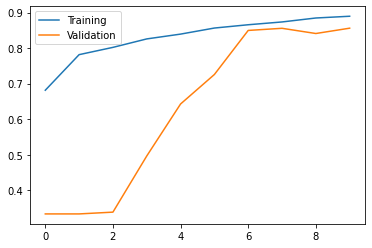

In [18]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']
plt.plot(range(len(accs)), accs, label = 'Training' )
plt.plot(range(len(val_accs)), val_accs, label = 'Validation' )
plt.legend()
plt.show()

In [0]:
model = tf.keras.models.load_model('models/model_0.882.h5')

In [0]:
pred = model.predict(x_test/255.)

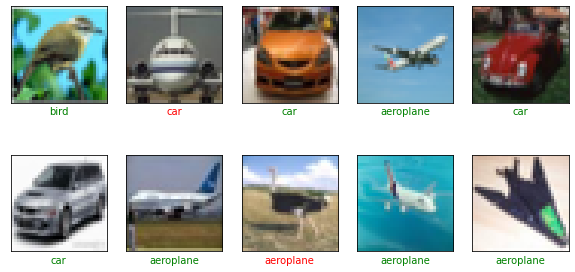

In [22]:
show_random_examples(x_test, y_test, pred)